# Baesyan Data Analysis - Chapter 2 Self Study Exercises


### Exercise 2.13: Falta accidents deaths on schedualed ariline flights (Poisson model)
Consider the following dataset:

In [3]:
import pandas as pd
from scipy.stats import gamma, poisson
import matplotlib.pyplot as plt
import numpy as np

d = {'year':[i for i in range(1976, 1986)], 'fatal_accidents':[24,25,31,31,22,21,26,20,16,22],
    'n_deaths':[734,516,754,877,814,362,764,809,223,1066], 'death_rate':[0.19,0.12,0.15,0.16,0.14,0.06,0.13,0.13,0.03,0.15]}
df = pd.DataFrame(data = d)
df

,year,fatal_accidents,n_deaths,death_rate
0,1976,24,734,0.19
1,1977,25,516,0.12
2,1978,31,754,0.15
3,1979,31,877,0.16
4,1980,22,814,0.14
5,1981,21,362,0.06
6,1982,26,764,0.13
7,1983,20,809,0.13
8,1984,16,223,0.03
9,1985,22,1066,0.15


**a.1)** Assume that the numbers of fatal accidents in each year are independent with a $Poisson(\theta)$ distribution. Set a prior distribution for $\theta$ and determine the posterior dsitribution based on the data from 1976 through 1985.

**Answer:** Conjugated prior will be of the form $Gamma(\alpha, \beta)$. One way is to set $\alpha = \beta = \epsilon \simeq 0$, and consider the posterior as $Gamma(\sum y_t, T)$, where $y_t$ is the number of fatal accidents in year $t$, and $T$ is the number of years in the sample, i.e.:

p(θ|y) ~ Gamma(238, 10)


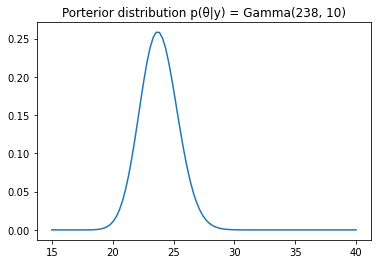

In [4]:
α = sum(df['fatal_accidents'])
β =  df.shape[0]
print("p(θ|y) ~ Gamma("+str(α)+", "+str(β)+")")

# plotting the posteiors
fig, ax = plt.subplots()
x = np.linspace(15, 40, 100)
ax.plot(x, gamma.pdf(x, a = α, scale = 1/β))
ax.set_title("Porterior distribution p(θ|y) = Gamma("+str(α)+", "+str(β)+")")

plt.show()       

**a.2)** Under this model, give a $95\%$ predictive interval for the number of fatal accidents in 1986. You can use the normal approximation to the gamma and Poisson or cumpute using simulation.

**Answer:** Computing using simulation: $\hat{y}$ is a draw from the predictive distribution, $p(\hat{y}|y)$. We exclude from these simulations the smallar and higher values.
    
Repeat n times {
* draw $\theta_i$ from $p(\theta|y)$
* draw $\hat{y}$ from $Poisson(\theta_i)$

In [5]:
n = 1000
thetas = [gamma.rvs(a = α, scale = 1/β) for i in range(n)]
y1986 = [poisson.rvs(theta) for theta in thetas]
y1986_95ci = np.sort(y1986)[[int(0.025*1000-1),int(0.975*1000)]]
print("the 95% predictive interval for the n. of fatal accidents in 1986 is", y1986_95ci)

the 95% predictive interval for the n. of fatal accidents in 1986 is [14 35]


**b)** Do the same as in **a)**, but with and exposure in each year proportional to the number of passenger miles flown (passenger miles flows = 100.000.000 x death/death_rate), assuming that exposure in 1986 is $8 \times 10^{11}$.

**Answer:** Considering the same prior for $\theta$, i.e., $p(\theta) = Gamma(\epsilon, \epsilon)$. Let $E_t$ be the exposure at year $t$. The posterior distribution is

$$p(\theta|y, E) = Gamma(\sum_{t = 1976}^{1985} y_t, \sum_{t = 1976}^{1985} E_t)$$

In [6]:
df['exposure'] = 1e8*df["n_deaths"]/df["death_rate"]
α = sum(df['fatal_accidents'])
β = sum(df['exposure'])

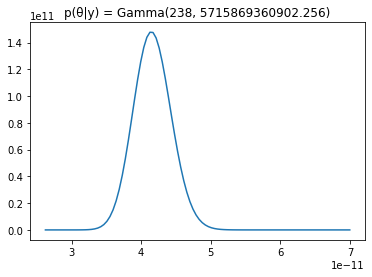

In [7]:
# plotting the posteiors
fig, ax = plt.subplots()
x = np.linspace(15, 40, 100)/np.mean(df['exposure'])
ax.plot(x, gamma.pdf(x, a = α, scale = 1/β))
ax.set_title("p(θ|y) = Gamma("+str(α)+", "+str(β)+")")

plt.show()    

Computing $\hat{y}$  using simulation:
    
Repeat n times {
* draw $\theta_i$ from $p(\theta|y)$
* draw $\hat{y}$ from $Poisson(E_{1986}\theta_i)$

In [8]:
n = 1000
thetas = [gamma.rvs(a = α, scale = 1/β) for i in range(n)]
y1986 = [poisson.rvs(8e11*theta) for theta in thetas]
y1986_95ci = np.sort(y1986)[[int(0.025*1000-1),int(0.975*1000)]]
print("the 95% predictive interval for the n. of fatal accidents in 1986 is", y1986_95ci)

the 95% predictive interval for the n. of fatal accidents in 1986 is [22 46]


**c)** Repeat **a)**, but with 'passenger deaths' as $y$

p(θ|y) ~ Gamma(6919, 10)


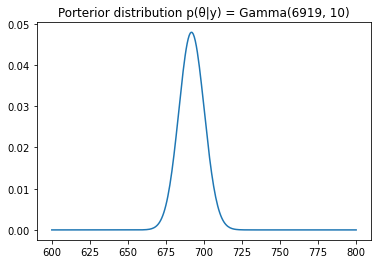

the 95% predictive interval for the n. of fatal accidents in 1986 is [644 752]


In [9]:
α = sum(df['n_deaths'])
β =  df.shape[0]
print("p(θ|y) ~ Gamma("+str(α)+", "+str(β)+")")

# plotting the posteiors
fig, ax = plt.subplots()
x = np.linspace(600, 800, 300)
ax.plot(x, gamma.pdf(x, a = α, scale = 1/β))
ax.set_title("Porterior distribution p(θ|y) = Gamma("+str(α)+", "+str(β)+")")
plt.show()

# 95% predictive interval
n = 1000
thetas = [gamma.rvs(a = α, scale = 1/β) for i in range(n)]
y1986 = [poisson.rvs(theta) for theta in thetas]
y1986_95ci = np.sort(y1986)[[int(0.025*1000-1),int(0.975*1000)]]
print("the 95% predictive interval for the n. of fatal accidents in 1986 is", y1986_95ci)

**d)** Repeat **b)**, but with 'passenger deaths' as $y$

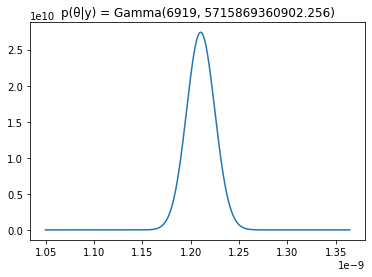

the 95% predictive interval for the n. of fatal accidents in 1986 is [ 905 1034]


In [10]:
α = sum(df['n_deaths'])
β = sum(df['exposure'])

# plotting the posteiors
fig, ax = plt.subplots()
x = np.linspace(600, 780, 1000)/np.mean(df['exposure'])
ax.plot(x, gamma.pdf(x, a = α, scale = 1/β))
ax.set_title("p(θ|y) = Gamma("+str(α)+", "+str(β)+")")

plt.show() 
n = 1000
thetas = [gamma.rvs(a = α, scale = 1/β) for i in range(n)]
y1986 = [poisson.rvs(8e11*theta) for theta in thetas]
y1986_95ci = np.sort(y1986)[[int(0.025*1000-1),int(0.975*1000)]]
print("the 95% predictive interval for the n. of fatal accidents in 1986 is", y1986_95ci)

**e)** In which of the cases above does the Poisson model seem more or less reasonable? Why? Discuss based on general principles, without specific reference to the numbers in table 2.2.

**Answer:** The models which includes overdispersion are intuitible reasonable, given that the more flights in place, the more fatal accidents may occour. But as time goes by, both technology and miles goes up (model for trend may be adequate). On the other hand, the Poisson models above seem more reasonable to number of accidents, because number of deaths depends on the number of passenger in the fatal crashers, so they are clustered (Poisson distribution assumes independe - while number of crashes are independent, the number of deaths are not, since they happen in the same accident).

### Exercise 2.14: Algebra of the normal model
**a)** Consider $y$, a single scalar observation from a normal distribution, with unkown mean $\mu$ and known variance $\sigma^2$. So

$$p(y|\theta) \propto exp\left(-\frac{1}{2\sigma^2}(y-\theta)^2\right),$$

and a parametrization of a conjugated prior density is $\theta \sim N(\mu_0, \tau_0^2)$, so:

$$p(\theta) \propto exp\left(-\frac{1}{2\tau_0^2}(\theta - \mu_0)^2\right).$$


This yields the posterior density

$$p(\theta|y) \propto exp\left(\frac{-1}{2}\left(\frac{(y-\theta)^2}{\sigma^2} + \frac{(\theta - \mu_0)^2}{\tau_0^2}\right)\right)$$

which can be shown to be normal distribution $N(\mu_i, \tau_1^2)$ where 


\begin{array}
    $\mu_1 = \dfrac{\dfrac{y}{\sigma^2} + \dfrac{\mu_0}{\tau_0^2}}{\dfrac{1}{\sigma^2} + \dfrac{1}{\tau_0^2}}; & \dfrac{1}{\tau_1^2} = \dfrac{1}{\sigma^2} + \dfrac{1}{\tau_0^2}
\end{array}

in fact, note that:

\begin{array}
$ \dfrac{1}{\tau_1^2} = \dfrac{1}{\sigma^2} + \dfrac{1}{\tau_0^2} = \dfrac{\tau_0^2 + \sigma^2}{\tau_0^2\sigma^2}; & \mu_1 = \dfrac{\dfrac{y}{\sigma^2} + \dfrac{\mu_0}{\tau_0^2}}{\dfrac{1}{\sigma^2} + \dfrac{1}{\tau_0^2}} = \dfrac{\sigma^2\mu_0 + \tau_0^2y}{\sigma^2 + \tau_0^2}
\end{array}

Define as $A(\theta)$ the term inside the posterior, which is a function of $\theta$:

\begin{array}
$A(\theta) &= \left(\dfrac{(y-\theta)^2}{\sigma^2} + \dfrac{(\theta - \mu_0)^2}{\tau_0^2}\right) &= \dfrac{(y-\theta)^2\tau_0^2 + (\theta - \mu_0)^2\sigma^2}{\sigma^2\tau_0^2}\\
&& =\dfrac{(y^2\tau_0^2 + \mu_0^2\sigma^2) - 2\theta(y\tau_0^2 + \mu_0\sigma^2) + \theta^2(\tau_0^2 + \sigma^2)}{\sigma^2\tau_0^2}\\
&& = \dfrac{\tau_0^2 + \sigma^2}{\tau_0^2\sigma^2}  \left[\theta^2- 2\theta\dfrac{y\tau_0^2 + \mu_0\sigma^2}{\tau_0^2 + \sigma^2} + \dfrac{y^2\tau_0^2 + \mu_0^2\sigma^2}{\tau_0^2 + \sigma^2}\right] \\
&& = \dfrac{1}{\tau_1^2}\left[\theta^2 - 2\theta\mu_1 + \dfrac{y^2\tau_0^2 + \mu_0^2\sigma^2}{\tau_0^2 + \sigma^2}\right]
\end{array}

So

$$p(\theta|y) \propto exp\left(-\dfrac{1}{2}A(\theta)\right)$$

Consider the constant $B$ ( constant since the posterior $p(\theta|y)$ depends only on $y$, and we assume the hyperparameters are known):

$$B = exp\left(-\dfrac{1}{2\tau_1^2}\left(\mu_1^2 - \dfrac{y^2\tau_0^2 + \mu_0^2\sigma^2}{\tau_0^2 + \sigma^2}\right)\right)$$

Since B does not depend on $\theta$, it follows that

\begin{array}
$ p(\theta|y) & \propto B \times exp\left(-\dfrac{1}{2}A(\theta)\right) \\
& = exp\left(\dfrac{1}{\tau_1^2} (\theta^2 - 2\theta\mu_1 + \mu_1^2)\right) \\
& = exp\left(\dfrac{1}{\tau_1^2} (\theta - \mu_1)^2\right)
\end{array}
